# Programming Assignment: 
## Готовим LDA по рецептам

Как вы уже знаете, в тематическом моделировании делается предположение о том, что для определения тематики порядок слов в документе не важен; об этом гласит гипотеза «мешка слов». Сегодня мы будем работать с несколько нестандартной для тематического моделирования коллекцией, которую можно назвать «мешком ингредиентов», потому что на состоит из рецептов блюд разных кухонь. Тематические модели ищут слова, которые часто вместе встречаются в документах, и составляют из них темы. Мы попробуем применить эту идею к рецептам и найти кулинарные «темы». Эта коллекция хороша тем, что не требует предобработки. Кроме того, эта задача достаточно наглядно иллюстрирует принцип работы тематических моделей.

Для выполнения заданий, помимо часто используемых в курсе библиотек, потребуются модули *json* и *gensim*. Первый входит в дистрибутив Anaconda, второй можно поставить командой 

*pip install gensim*

Построение модели занимает некоторое время. На ноутбуке с процессором Intel Core i7 и тактовой частотой 2400 МГц на построение одной модели уходит менее 10 минут.

### Загрузка данных

Коллекция дана в json-формате: для каждого рецепта известны его id, кухня (cuisine) и список ингредиентов, в него входящих. Загрузить данные можно с помощью модуля json (он входит в дистрибутив Anaconda):

In [1]:
import json
import numpy as np
np.__version__

'1.12.0'

In [2]:
with open("recipes.json") as f:
    recipes = json.load(f)

In [3]:
print recipes[0]

{u'cuisine': u'greek', u'id': 10259, u'ingredients': [u'romaine lettuce', u'black olives', u'grape tomatoes', u'garlic', u'pepper', u'purple onion', u'seasoning', u'garbanzo beans', u'feta cheese crumbles']}


### Составление корпуса

In [4]:
from gensim import corpora, models
import numpy as np

Наша коллекция небольшая, и целиком помещается в оперативную память. Gensim может работать с такими данными и не требует их сохранения на диск в специальном формате. Для этого коллекция должна быть представлена в виде списка списков, каждый внутренний список соответствует отдельному документу и состоит из его слов. Пример коллекции из двух документов: 

[["hello", "world"], ["programming", "in", "python"]]

Преобразуем наши данные в такой формат, а затем создадим объекты corpus и dictionary, с которыми будет работать модель.

In [5]:
texts = [recipe["ingredients"] for recipe in recipes]
dictionary = corpora.Dictionary(texts)   # составляем словарь
corpus = [dictionary.doc2bow(text) for text in texts]  # составляем корпус документов

In [6]:
print type(dictionary)
print dictionary

<class 'gensim.corpora.dictionary.Dictionary'>
Dictionary(6714 unique tokens: [u'low-sodium fat-free chicken broth', u'sweetened coconut', u'baking chocolate', u'egg roll wrappers', u'bottled low sodium salsa']...)


In [7]:
print texts[0]
print corpus[0]
dictionary.token2id

[u'romaine lettuce', u'black olives', u'grape tomatoes', u'garlic', u'pepper', u'purple onion', u'seasoning', u'garbanzo beans', u'feta cheese crumbles']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]


{u'low-sodium fat-free chicken broth': 3067,
 u'sweetened coconut': 4351,
 u'baking chocolate': 4124,
 u'egg roll wrappers': 197,
 u'bottled low sodium salsa': 6280,
 u'vegan parmesan cheese': 1712,
 u'clam sauce': 5433,
 u'mahlab': 6168,
 u'(10 oz.) frozen chopped spinach, thawed and squeezed dry': 1988,
 u'figs': 1317,
 u'caramels': 3788,
 u'broiler': 3467,
 u'jalapeno chilies': 58,
 u'(15 oz.) refried beans': 5108,
 u'brioche buns': 5186,
 u'broccoli romanesco': 5876,
 u'flaked oats': 5838,
 u'anise extract': 2055,
 u'whole wheat pastry flour': 2193,
 u'ravva': 1403,
 u'bacon': 208,
 u'millet': 3209,
 u'country crock honey spread': 4572,
 u'matcha green tea powder': 326,
 u'chopped fresh thyme': 674,
 u'chicken gravy mix': 4786,
 u'walnut oil': 3608,
 u'Kraft Slim Cut Mozzarella Cheese Slices': 6704,
 u'fresh angel hair': 3628,
 u'salsify': 2726,
 u'galangal': 911,
 u'chicken schmaltz': 2331,
 u'butter crackers': 1469,
 u'jasmine': 2030,
 u'Bisquick Baking Mix': 3920,
 u'canned jala

У объекта dictionary есть полезная переменная dictionary.token2id, позволяющая находить соответствие между ингредиентами и их индексами.

### Обучение модели
Вам может понадобиться [документация](https://radimrehurek.com/gensim/models/ldamodel.html) LDA в gensim.

__Задание 1.__ Обучите модель LDA с 40 темами, установив количество проходов по коллекции 5 и оставив остальные параметры по умолчанию. 


Затем вызовите метод модели *show_topics*, указав количество тем 40 и количество токенов 10, и сохраните результат (топы ингредиентов в темах) в отдельную переменную. Если при вызове метода *show_topics* указать параметр *formatted=True*, то топы ингредиентов будет удобно выводить на печать, если *formatted=False*, будет удобно работать со списком программно. Выведите топы на печать, рассмотрите темы, а затем ответьте на вопрос:

Сколько раз ингредиенты "salt", "sugar", "water", "mushrooms", "chicken", "eggs" встретились среди топов-10 всех 40 тем? При ответе __не нужно__ учитывать составные ингредиенты, например, "hot water".

Передайте 6 чисел в функцию save_answers1 и загрузите сгенерированный файл в форму.

У gensim нет возможности фиксировать случайное приближение через параметры метода, но библиотека использует numpy для инициализации матриц. Поэтому, по утверждению автора библиотеки, фиксировать случайное приближение нужно командой, которая написана в следующей ячейке. __Перед строкой кода с построением модели обязательно вставляйте указанную строку фиксации random.seed.__

In [8]:
np.random.seed(76543)
# здесь код для построения модели:
%time ldamodel = models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=40, passes=5)

CPU times: user 1min 8s, sys: 317 ms, total: 1min 8s
Wall time: 1min 8s


In [9]:
import collections
result = ldamodel.show_topics(40, 10, formatted=False)
words = []
for theme in result:
    for x in theme[1]:
        words.append(x[0])

amount = collections.Counter(words)
amount['salt']

20

In [10]:
def save_answers1(c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs):
    with open("cooking_LDA_pa_task1.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs]]))

In [11]:
save_answers1(amount['salt'], amount['sugar'], amount['water'], amount['mushrooms'], amount['chicken'],
              amount['eggs'])

### Фильтрация словаря
В топах тем гораздо чаще встречаются первые три рассмотренных ингредиента, чем последние три. При этом наличие в рецепте курицы, яиц и грибов яснее дает понять, что мы будем готовить, чем наличие соли, сахара и воды. Таким образом, даже в рецептах есть слова, часто встречающиеся в текстах и не несущие смысловой нагрузки, и поэтому их не желательно видеть в темах. Наиболее простой прием борьбы с такими фоновыми элементами — фильтрация словаря по частоте. Обычно словарь фильтруют с двух сторон: убирают очень редкие слова (в целях экономии памяти) и очень частые слова (в целях повышения интерпретируемости тем). Мы уберем только частые слова.

In [12]:
import copy
dictionary2 = copy.deepcopy(dictionary)
dictionary2.dfs

{0: 4438,
 1: 137,
 2: 148,
 3: 228,
 4: 7380,
 5: 229,
 6: 358,
 7: 270,
 8: 1896,
 9: 4385,
 10: 154,
 11: 361,
 12: 4784,
 13: 3388,
 14: 341,
 15: 108,
 16: 385,
 17: 18048,
 18: 2263,
 19: 3058,
 20: 1442,
 21: 4847,
 22: 768,
 23: 483,
 24: 65,
 25: 781,
 26: 3296,
 27: 5,
 28: 1184,
 29: 7457,
 30: 26,
 31: 103,
 32: 839,
 33: 2036,
 34: 343,
 35: 18,
 36: 282,
 37: 1394,
 38: 2627,
 39: 1523,
 40: 24,
 41: 1970,
 42: 40,
 43: 1477,
 44: 925,
 45: 7972,
 46: 2747,
 47: 338,
 48: 6434,
 49: 1738,
 50: 501,
 51: 1231,
 52: 678,
 53: 1298,
 54: 7971,
 55: 103,
 56: 461,
 57: 554,
 58: 1730,
 59: 1094,
 60: 796,
 61: 73,
 62: 940,
 63: 1348,
 64: 1,
 65: 173,
 66: 22,
 67: 51,
 68: 300,
 69: 424,
 70: 164,
 71: 965,
 72: 119,
 73: 1698,
 74: 1439,
 75: 56,
 76: 1137,
 77: 298,
 78: 3113,
 79: 2747,
 80: 62,
 81: 1223,
 82: 134,
 83: 1706,
 84: 578,
 85: 185,
 86: 164,
 87: 55,
 88: 154,
 89: 439,
 90: 1503,
 91: 505,
 92: 425,
 93: 168,
 94: 1891,
 95: 1773,
 96: 264,
 97: 341,
 98:

__Задание 2.__ У объекта dictionary2 есть переменная *dfs* — это словарь, ключами которого являются id токена, а элементами — число раз, сколько слово встретилось во всей коллекции. Сохраните в отдельный список ингредиенты, которые встретились в коллекции больше 4000 раз. Вызовите метод словаря *filter_tokens*, подав в качестве первого аргумента полученный список популярных ингредиентов. Вычислите две величины: dict_size_before и dict_size_after — размер словаря до и после фильтрации.

Затем, используя новый словарь, создайте новый корпус документов, corpus2, по аналогии с тем, как это сделано в начале ноутбука. Вычислите две величины: corpus_size_before и corpus_size_after — суммарное количество ингредиентов в корпусе (для каждого документа вычислите число различных ингредиентов в нем и просуммируйте по всем документам) до и после фильтрации.

Передайте величины dict_size_before, dict_size_after, corpus_size_before, corpus_size_after в функцию save_answers2 и загрузите сгенерированный файл в форму.

In [13]:
more_4000 = []
for x in dictionary2.dfs.items():
    if x[1] > 4000:
        more_4000.append(x[0])
        
dictionary2.filter_tokens(more_4000)
dict_size_before = len(dictionary.dfs)
dict_size_after = len(dictionary2.dfs)
print(dict_size_before)
print(dict_size_after)

corpus_size_before = 0
for text in corpus:
    for word in text:
        corpus_size_before += word[1]


corpus2 = [dictionary2.doc2bow(text) for text in texts]

corpus_size_after = 0
for text in corpus2:
    for word in text:
        corpus_size_after += word[1]


sub_result = 0
for x in dictionary.dfs.values():
    sub_result += x
    
    
#sub_result_2 = 0
#for x in dictionary2.dfs.values():
#    sub_result_2 += x

sub_result_2 = 0   
for i in range(dict_size_after):
    sub_result_2 += dictionary2.dfs[i]


# don't match. ???
print corpus_size_before, corpus_size_after
print sub_result, sub_result_2

6714
6702
428275 343686
428249 343665


In [14]:
def save_answers2(dict_size_before, dict_size_after, corpus_size_before, corpus_size_after):
    with open("cooking_LDA_pa_task2.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [dict_size_before, dict_size_after, corpus_size_before, corpus_size_after]]))

In [15]:
save_answers2(dict_size_before, dict_size_after, sub_result, sub_result_2)

### Сравнение когерентностей
__Задание 3.__ Постройте еще одну модель по корпусу corpus2 и словарю dictionary2, остальные параметры оставьте такими же, как при первом построении модели. Сохраните новую модель в другую переменную (не перезаписывайте предыдущую модель). Не забудьте про фиксирование seed!

Затем воспользуйтесь методом *top_topics* модели, чтобы вычислить ее когерентность. Передайте в качестве аргумента соответствующий модели корпус. Метод вернет список кортежей (топ токенов, когерентность), отсортированных по убыванию последней. Вычислите среднюю по всем темам когерентность для каждой из двух моделей и передайте в функцию save_answers3. 

In [16]:
np.random.seed(76543)
%time ldamodel_2 = models.ldamodel.LdaModel(corpus2, id2word=dictionary2, num_topics=40, passes=5)

CPU times: user 52.6 s, sys: 140 ms, total: 52.8 s
Wall time: 52.9 s


In [17]:
corteges = ldamodel.top_topics(corpus)
corteges_2 = ldamodel_2.top_topics(corpus2)

In [18]:
def save_answers3(coherence, coherence2):
    with open("cooking_LDA_pa_task3.txt", "w") as fout:
        fout.write(" ".join(["%3f"%el for el in [coherence, coherence2]]))

In [19]:
coherence_1 = 0
for x in corteges:
    coherence_1 += x[1]
    
coherence_1 /= len(corteges)


coherence_2 = 0
for x in corteges_2:
    coherence_2 += x[1]

coherence_2 /= len(corteges_2)


print coherence_1, coherence_2
save_answers3(coherence_1, coherence_2)

-691.775594626 -752.9709755


Считается, что когерентность хорошо соотносится с человеческими оценками интерпретируемости тем. Поэтому на больших текстовых коллекциях когерентность обычно повышается, если убрать фоновую лексику. Однако в нашем случае этого не произошло. 

### Изучение влияния гиперпараметра alpha

В этом разделе мы будем работать со второй моделью, то есть той, которая построена по сокращенному корпусу. 

Пока что мы посмотрели только на матрицу темы-слова, теперь давайте посмотрим на матрицу темы-документы. Выведите темы для нулевого (или любого другого) документа из корпуса, воспользовавшись методом *get_document_topics* второй модели:

In [20]:
ldamodel_2.get_document_topics(dictionary2.doc2bow(texts[0]))

[(4, 0.12812499999999991),
 (15, 0.32368464962559051),
 (22, 0.27665871617377874),
 (37, 0.15903163420063021)]

In [23]:
# ldamodel_3.minimum_probability = 0.01
# ldamodel_3.get_document_topics(dictionary2.doc2bow(texts[0]))

Также выведите содержимое переменной *.alpha* второй модели:

In [24]:
ldamodel_2.alpha

array([ 0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,
        0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,
        0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,
        0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,
        0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025])

У вас должно получиться, что документ характеризуется небольшим числом тем. Попробуем поменять гиперпараметр alpha, задающий априорное распределение Дирихле для распределений тем в документах.

__Задание 4.__ Обучите третью модель: используйте сокращенный корпус (corpus2 и dictionary2) и установите параметр __alpha=1__, passes=5. Не забудьте про фиксацию seed! Выведите темы новой модели для нулевого документа; должно получиться, что распределение над множеством тем практически равномерное. Чтобы убедиться в том, что во второй модели документы описываются гораздо более разреженными распределениями, чем в третьей, посчитайте суммарное количество элементов, __превосходящих 0.01__, в матрицах темы-документы обеих моделей. Другими словами, запросите темы  модели для каждого документа с параметром *minimum_probability=0.01* и просуммируйте число элементов в получаемых массивах. Передайте две суммы (сначала для модели с alpha по умолчанию, затем для модели в alpha=1) в функцию save_answers4.

In [25]:
np.random.seed(76543)
%time ldamodel_3 = models.ldamodel.LdaModel(corpus2, id2word=dictionary2, passes=5, alpha=1)

CPU times: user 47.5 s, sys: 474 ms, total: 48 s
Wall time: 48.3 s


In [26]:
np.random.seed(76543)
%time ldamodel_2_2 = models.ldamodel.LdaModel(corpus2, id2word=dictionary2, passes=5)

CPU times: user 52.1 s, sys: 369 ms, total: 52.5 s
Wall time: 52.6 s


In [27]:
# ldamodel_3.get_document_topics(dictionary2.doc2bow(texts[0]))

sum_2 = 0

for text in texts:
    for theme_prob in ldamodel_2_2.get_document_topics(dictionary2.doc2bow(text)):
        if theme_prob[1] > 0.01:
            sum_2 += theme_prob[1]

print sum_2

35100.3018301


In [28]:
sum_3 = 0

for text in texts:
    for theme_prob in ldamodel_3.get_document_topics(dictionary2.doc2bow(text)):
        if theme_prob[1] > 0.01:
            sum_3 += theme_prob[1]

print sum_3

6298.3115278


In [29]:
def save_answers4(count_model2, count_model3):
    with open("cooking_LDA_pa_task4.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [count_model2, count_model3]]))

In [30]:
save_answers4(sum_2, sum_3)

Таким образом, гиперпараметр __alpha__ влияет на разреженность распределений тем в документах. Аналогично гиперпараметр __eta__ влияет на разреженность распределений слов в темах.

### LDA как способ понижения размерности
Иногда, распределения над темами, найденные с помощью LDA, добавляют в матрицу объекты-признаки как дополнительные, семантические, признаки, и это может улучшить качество решения задачи. Для простоты давайте просто обучим классификатор рецептов на кухни на признаках, полученных из LDA, и измерим точность (accuracy).

__Задание 5.__ Используйте модель, построенную по сокращенной выборке с alpha по умолчанию (вторую модель). Составьте матрицу $\Theta = p(t|d)$ вероятностей тем в документах; вы можете использовать тот же метод get_document_topics, а также вектор правильных ответов y (в том же порядке, в котором рецепты идут в переменной recipes). Создайте объект RandomForestClassifier со 100 деревьями, с помощью функции cross_val_score вычислите среднюю accuracy по трем фолдам (перемешивать данные не нужно) и передайте в функцию save_answers5.

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [32]:
matrix = np.zeros((len(texts), 40))

for ind, text in enumerate(texts):
    matrix[ind] = np.array(ldamodel_2.get_document_topics(dictionary2.doc2bow(text), minimum_probability=-1))[:, 1]

In [33]:
answeres = []
for recipe in recipes:
    answeres.append(recipe['cuisine'])

answeres = np.array(answeres)

In [34]:
classifier = RandomForestClassifier(n_estimators=100)
result = cross_val_score(classifier, matrix, answeres, cv=3).mean()

In [35]:
def save_answers5(accuracy):
     with open("cooking_LDA_pa_task5.txt", "w") as fout:
        fout.write(str(accuracy))

In [36]:
save_answers5(result)

Для такого большого количества классов это неплохая точность. Вы можете попроовать обучать RandomForest на исходной матрице частот слов, имеющей значительно большую размерность, и увидеть, что accuracy увеличивается на 10–15%. Таким образом, LDA собрал не всю, но достаточно большую часть информации из выборки, в матрице низкого ранга.

### LDA — вероятностная модель
Матричное разложение, использующееся в LDA, интерпретируется как следующий процесс генерации документов.

Для документа $d$ длины $n_d$:
1. Из априорного распределения Дирихле с параметром alpha сгенерировать распределение над множеством тем: $\theta_d \sim Dirichlet(\alpha)$
1. Для каждого слова $w = 1, \dots, n_d$:
    1. Сгенерировать тему из дискретного распределения $t \sim \theta_{d}$
    1. Сгенерировать слово из дискретного распределения $w \sim \phi_{t}$.
    
Подробнее об этом в [Википедии](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation).

В контексте нашей задачи получается, что, используя данный генеративный процесс, можно создавать новые рецепты. Вы можете передать в функцию модель и число ингредиентов и сгенерировать рецепт :)

In [37]:
def generate_recipe(model, num_ingredients):
    theta = np.random.dirichlet(model.alpha)
    for i in range(num_ingredients):
        t = np.random.choice(np.arange(model.num_topics), p=theta)
        topic = model.show_topic(t, topn=model.num_terms)
        topic_distr = [x[1] for x in topic]
        terms = [x[0] for x in topic]
        w = np.random.choice(terms, p=topic_distr)
        print w

### Интерпретация построенной модели
Вы можете рассмотреть топы ингредиентов каждой темы. Большиснтво тем сами по себе похожи на рецепты; в некоторых собираются продукты одного вида, например, свежие фрукты или разные виды сыра.

Попробуем эмпирически соотнести наши темы с национальными кухнями (cuisine). Построим матрицу $A$ размера темы $x$ кухни, ее элементы $a_{tc}$ — суммы $p(t|d)$ по всем документам $d$, которые отнесены к кухне $c$. Нормируем матрицу на частоты рецептов по разным кухням, чтобы избежать дисбаланса между кухнями. Следующая функция получает на вход объект модели, объект корпуса и исходные данные и возвращает нормированную матрицу $A$. Ее удобно визуализировать с помощью seaborn.

In [38]:
import numpy as np
import pandas
import seaborn
from matplotlib import pyplot as plt
%matplotlib inline

In [39]:
import numpy
numpy.__version__

'1.12.0'

In [40]:
def compute_topic_cuisine_matrix(model, corpus, recipes):
    # составляем вектор целевых признаков
    targets = list(set([recipe["cuisine"] for recipe in recipes]))
    # составляем матрицу
    tc_matrix = pandas.DataFrame(data=np.zeros((model.num_topics, len(targets))), columns=targets)
    for recipe, bow in zip(recipes, corpus):
        recipe_topic = model.get_document_topics(bow)
        for t, prob in recipe_topic:
            tc_matrix[recipe["cuisine"]][t] += prob
    # нормируем матрицу
    target_sums = pandas.DataFrame(data=np.zeros((1, len(targets))), columns=targets)
    for recipe in recipes:
        target_sums[recipe["cuisine"]] += 1
    return pandas.DataFrame(tc_matrix.values/target_sums.values, columns=tc_matrix.columns)

In [41]:
def plot_matrix(tc_matrix):
    plt.figure(figsize=(10, 10))
    seaborn.heatmap(tc_matrix, square=True)

In [43]:
# Визуализируйте матрицу
tc_matrix = compute_topic_cuisine_matrix(ldamodel_2, corpus2, recipes)

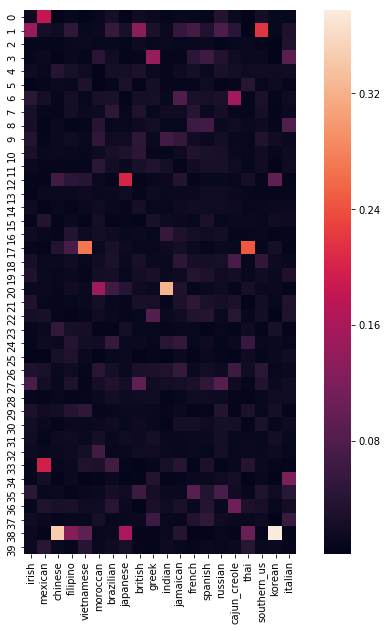

In [44]:
plot_matrix(tc_matrix)

Чем темнее квадрат в матрице, тем больше связь этой темы с данной кухней. Мы видим, что у нас есть темы, которые связаны с несколькими кухнями. Такие темы показывают набор ингредиентов, которые популярны в кухнях нескольких народов, то есть указывают на схожесть кухонь этих народов. Некоторые темы распределены по всем кухням равномерно, они показывают наборы продуктов, которые часто используются в кулинарии всех стран. 

Жаль, что в датасете нет названий рецептов, иначе темы было бы проще интерпретировать...

### Заключение
В этом задании вы построили несколько моделей LDA, посмотрели, на что влияют гиперпараметры модели и как можно использовать построенную модель. 